In [17]:
import psycopg2
import pandas as pd
from src.resources.config import *
from src.resources.resources import *
import joblib

In [18]:
conn_info = {
    "host": "localhost",
    "port": 5432,
    "database": "pointclouds",
    "user": username,
    "password": password
}
conn = psycopg2.connect(**conn_info)

In [19]:
curs = conn.cursor("named")
cols = ['X', 'Y', 'Z', 'linearity', 'planarity', 'scattering', 'verticality','heightaboveground']
curs.execute(f"SELECT {','.join(cols)} FROM test_data_prepped")
df = pd.DataFrame(curs.fetchall(), columns=cols, dtype=float)
curs.close()

In [30]:
xgb = joblib.load('src/models/xgboostv1.2.dat')

In [31]:
data = df[df['heightaboveground']>10]
preds = xgb.predict(data[['linearity',
                                      'planarity',
                                      'scattering',
                                      'verticality']].astype(float))
data['label'] = preds
poles = data[data['label']==1]

/home/chase/PycharmProjects/PointCloud/envs/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


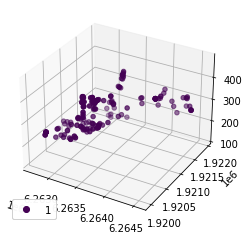

In [32]:
plot3d(poles)

In [33]:
import laspy
import numpy as np

header = laspy.header.Header()
outfile = laspy.file.File('/media/sf_RECON/test.las', mode='w', header=header)
outfile.header.min = [min(poles['X']),
                     min(poles['Y']),
                     min(poles['Z'])]
outfile.header.max = [max(poles['X']),
                     max(poles['Y']),
                     max(poles['Z'])]
outfile.header.offset = [0., 0., 0.]
outfile.header.scale = [1., 1., 1.]
outfile.X = poles['X'].astype('int64')
outfile.Y = poles['Y'].astype('int64')
outfile.Z = poles['Z'].astype('int64')
outfile.close()

In [9]:
poles.head()

,X,Y,Z,linearity,planarity,scattering,verticality,label
2364,6262886.282,1920013.191,268.269,0.352965,0.278081,0.368953,0.494247,1
3775,6262731.034,1920169.829,211.939,0.431581,0.390178,0.178241,0.719921,1
3776,6262731.292,1920169.921,211.945,0.431581,0.390178,0.178241,0.719921,1
3790,6262706.038,1920172.531,223.153,0.361150,0.170386,0.468463,0.600279,1
3795,6262710.634,1920173.979,222.419,0.361150,0.170386,0.468463,0.600279,1
